## **Tourism Recommendation System**

#### **Import Library**

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import drive

#### **Define Data**

In [3]:
# Connect to GDrive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Define dataset path
tourism = pd.read_csv('/content/drive/MyDrive/KULIAH/TA-2/SIDANG/TASI-107/DATA/Data_Crawler.csv')

print(tourism.shape)
tourism.head()

(10649, 22)


,placeId,destination_name,category_name,address,Kecamatan,postal_code,state,place_rating,lat,lng,...,two Star,three Star,four Star,five Star,reviewerId,name,text,publishAt,publishedAtDate,user_rating
0,1,Agrowisata Batulamak,wisata pertanian,"Gurgur Aek Raja, Tampahan, Kabupaten Toba Samo...",Tampahan,22312.0,Sumatera Utara,5.0,23.109.321,990.258.667,...,0.0,0.0,0.0,4.0,0,Rini Hutauruk,"Yuks mari petik sendiri ,",setahun lalu,2020-11-01T11:12:16.322Z,5
1,1,Agrowisata Batulamak,wisata pertanian,"Gurgur Aek Raja, Tampahan, Kabupaten Toba Samo...",Tampahan,22312.0,NaN,5.0,23.109.321,990.258.667,...,NaN,NaN,NaN,NaN,1,Dewi Tampubolon,"Suka bgt tempat ini, asri bgt, asik ,bisa meti...",setahun lalu,2020-10-30T23:03:23.379Z,5
2,1,Agrowisata Batulamak,wisata pertanian,"Gurgur Aek Raja, Tampahan, Kabupaten Toba Samo...",Tampahan,22312.0,NaN,5.0,23.109.321,990.258.667,...,NaN,NaN,NaN,NaN,2,amsal gultom,👍,10 bulan lalu,2021-01-22T19:37:46.089Z,5
3,1,Agrowisata Batulamak,wisata pertanian,"Gurgur Aek Raja, Tampahan, Kabupaten Toba Samo...",Tampahan,22312.0,NaN,5.0,23.109.321,990.258.667,...,NaN,NaN,NaN,NaN,3,Juandi Sianipar,NaN,setahun lalu,2020-11-01T10:10:57.174Z,5
4,2,Gunung Pangulubao,wisata alam,"Jangga Toruan, Lumban Julu, Toba, North Sumatr...",Lumban Julu,22312.0,Sumatera Utara,5.0,2.597.778,99.065.278,...,0.0,1.0,1.0,1.0,4,Ra Ni,NaN,11 bulan lalu,2021-01-29T02:39:42.738Z,5


In [5]:
tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10649 entries, 0 to 10648
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   placeId           10649 non-null  int64  
 1   destination_name  10649 non-null  object 
 2   category_name     10649 non-null  object 
 3   address           10649 non-null  object 
 4   Kecamatan         10649 non-null  object 
 5   postal_code       10557 non-null  float64
 6   state             63 non-null     object 
 7   place_rating      10649 non-null  float64
 8   lat               10649 non-null  object 
 9   lng               10649 non-null  object 
 10  reviews_count     64 non-null     float64
 11  one Star          63 non-null     float64
 12  two Star          63 non-null     float64
 13  three Star        63 non-null     float64
 14  four Star         63 non-null     float64
 15  five Star         63 non-null     float64
 16  reviewerId        10649 non-null  int64 

In [6]:
tourism.describe().T

,count,mean,std,min,25%,50%,75%,max
placeId,10649.0,50.938586,12.991053,1.0,48.00,57.0,59.0,65.0
postal_code,10557.0,22294.524013,227.808819,21174.0,22312.00,22312.0,22384.0,22386.0
place_rating,10649.0,4.402996,0.158278,3.1,4.30,4.4,4.5,5.0
reviews_count,64.0,166.343750,435.179117,0.0,6.75,23.5,119.5,2736.0
one Star,63.0,6.269841,17.800151,0.0,0.00,1.0,3.5,117.0
two Star,63.0,3.460317,10.116778,0.0,0.00,0.0,2.0,69.0
three Star,63.0,14.698413,40.288330,0.0,0.00,2.0,15.5,278.0
four Star,63.0,33.968254,95.344362,0.0,0.00,3.0,23.0,636.0
five Star,63.0,110.587302,278.822445,0.0,6.00,18.0,76.0,1636.0
reviewerId,10649.0,3959.584374,2572.977696,0.0,1628.00,3780.0,6150.0,8749.0


#### **Data Exploration**

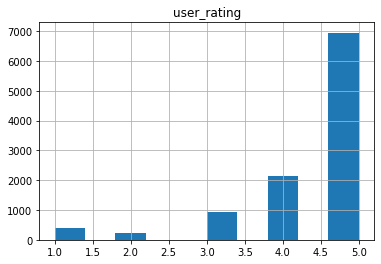

In [7]:
# Check missing value
tourism.hist('user_rating', bins = 10);

In [8]:
# Rating Information
ratings = tourism['user_rating'].value_counts()
ratings

5    6952
4    2143
3     930
1     399
2     225
Name: user_rating, dtype: int64

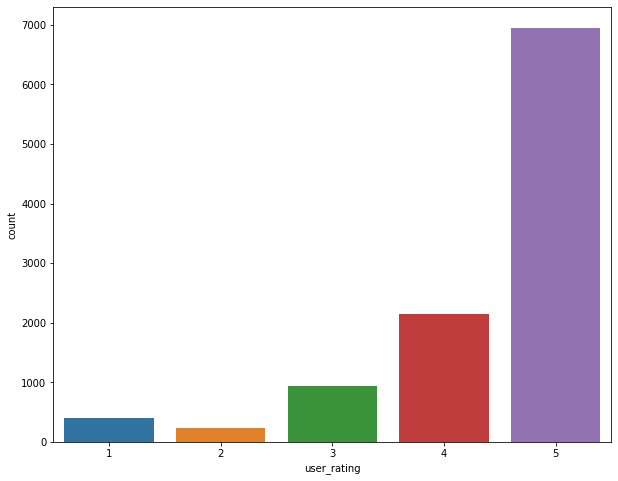

In [9]:
# Rating distribution
dims = (10, 8)
fig, ax = plt.subplots(figsize=dims)
ax = sns.countplot(x="user_rating", data=tourism)

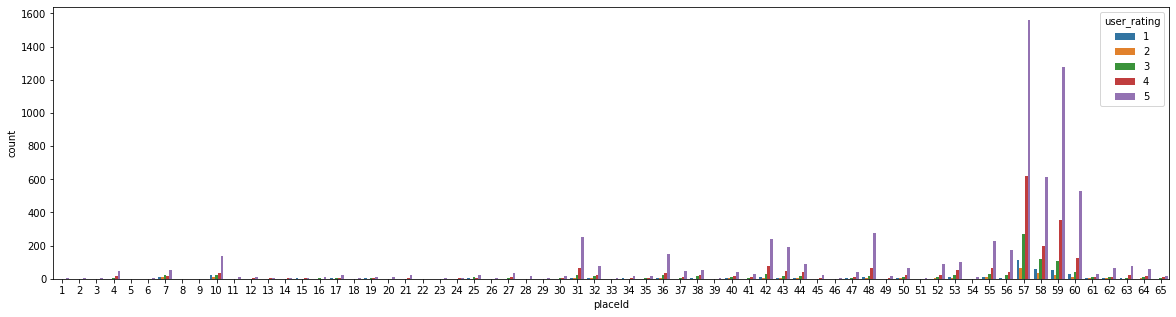

In [10]:
dims = (20, 5)
fig, ax = plt.subplots(figsize=dims)
ax = sns.countplot(x="placeId",hue="user_rating", data=tourism)

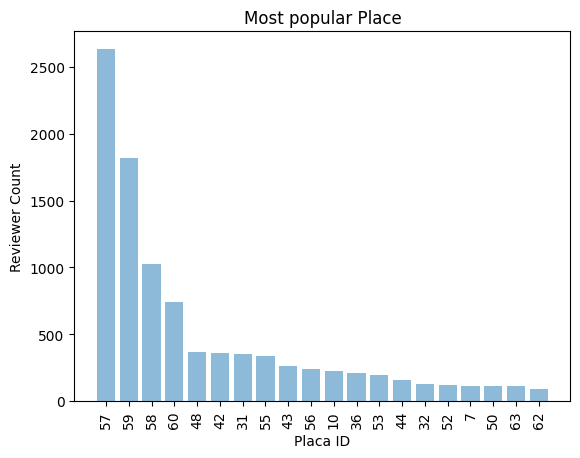

In [11]:
popular = tourism[['placeId','user_rating']].groupby('placeId').count().reset_index()
popular_20 = popular.sort_values('user_rating', ascending=False).head(n=20)

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = (list(popular_20['placeId']))
y_pos = np.arange(len(objects))
performance = list(popular_20['user_rating'])
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Reviewer Count')
plt.xlabel('Placa ID')
plt.title('Most popular Place')
 
plt.show()

In [12]:
ratings_df_count=pd.DataFrame(tourism.groupby('placeId')['user_rating'].count()
             .reset_index()
             .rename(columns={'placeId':'placeId','user_rating':'rating_count'}))

#sorting by Correlation to find which has highest correlation
ratings_df_count=ratings_df_count.sort_values('rating_count',ascending=False)
display(ratings_df_count.head())


,placeId,rating_count
56,57,2633
58,59,1815
57,58,1029
59,60,741
47,48,367


In [13]:
# Reorder the ratings 
tourism.sort_values(by='user_rating', ascending=False).head()

,placeId,destination_name,category_name,address,Kecamatan,postal_code,state,place_rating,lat,lng,...,two Star,three Star,four Star,five Star,reviewerId,name,text,publishAt,publishedAtDate,user_rating
0,1,Agrowisata Batulamak,wisata pertanian,"Gurgur Aek Raja, Tampahan, Kabupaten Toba Samo...",Tampahan,22312.0,Sumatera Utara,5.0,23.109.321,990.258.667,...,0.0,0.0,0.0,4.0,0,Rini Hutauruk,"Yuks mari petik sendiri ,",setahun lalu,2020-11-01T11:12:16.322Z,5
6460,57,Pantai Lumban Bul-bul Balige,wisata bahari,"Lumban Bulbul, Balige, Kabupaten Toba Samosir,...",Balige,22312.0,NaN,4.3,23.484.022,990.732.353,...,NaN,NaN,NaN,NaN,5612,Elfrida S,NaN,2 tahun lalu,2019-01-08T03:25:43.981Z,5
6517,57,Pantai Lumban Bul-bul Balige,wisata bahari,"Lumban Bulbul, Balige, Kabupaten Toba Samosir,...",Balige,22312.0,NaN,4.3,23.484.022,990.732.353,...,NaN,NaN,NaN,NaN,5660,Ty Wannablelf,NaN,setahun lalu,2020-02-22T02:07:25.356Z,5
6516,57,Pantai Lumban Bul-bul Balige,wisata bahari,"Lumban Bulbul, Balige, Kabupaten Toba Samosir,...",Balige,22312.0,NaN,4.3,23.484.022,990.732.353,...,NaN,NaN,NaN,NaN,5659,Jaya 1234,NaN,setahun lalu,2020-05-16T07:28:56.972Z,5
6515,57,Pantai Lumban Bul-bul Balige,wisata bahari,"Lumban Bulbul, Balige, Kabupaten Toba Samosir,...",Balige,22312.0,NaN,4.3,23.484.022,990.732.353,...,NaN,NaN,NaN,NaN,5658,jospin lumban gaol,NaN,3 tahun lalu,2018-07-25T08:02:12.421Z,5


In [14]:
tourism.sort_values(by='user_rating', ascending=False).tail()

,placeId,destination_name,category_name,address,Kecamatan,postal_code,state,place_rating,lat,lng,...,two Star,three Star,four Star,five Star,reviewerId,name,text,publishAt,publishedAtDate,user_rating
10025,60,The Kaldera,wisata alam,"Sigapiton, Ajibata, Kabupaten Toba Samosir, Su...",Ajibata,22386.0,NaN,4.5,26.067.911,989.459.367,...,NaN,NaN,NaN,NaN,8340,Desran Sinurat,NaN,7 bulan lalu,2021-04-12T08:39:47.032Z,1
6333,57,Pantai Lumban Bul-bul Balige,wisata bahari,"Lumban Bulbul, Balige, Kabupaten Toba Samosir,...",Balige,22312.0,NaN,4.3,23.484.022,990.732.353,...,NaN,NaN,NaN,NaN,5503,Roland Zoe,NaN,3 tahun lalu,2018-08-25T15:00:58.520Z,1
6331,57,Pantai Lumban Bul-bul Balige,wisata bahari,"Lumban Bulbul, Balige, Kabupaten Toba Samosir,...",Balige,22312.0,NaN,4.3,23.484.022,990.732.353,...,NaN,NaN,NaN,NaN,5501,Daniela Silitonga,NaN,2 tahun lalu,2019-05-27T09:01:42.860Z,1
2866,48,Air Terjun Situmurun,wisata alam,"Jonggi Nihuta, Lumban Julu, Hatinggian, Lumban...",Lumban Julu,22386.0,NaN,4.6,25.370.911,990.081.719,...,NaN,NaN,NaN,NaN,2560,Metalia Dewi,NaN,3 tahun lalu,2018-03-07T09:36:41.902Z,1
6528,57,Pantai Lumban Bul-bul Balige,wisata bahari,"Lumban Bulbul, Balige, Kabupaten Toba Samosir,...",Balige,22312.0,NaN,4.3,23.484.022,990.732.353,...,NaN,NaN,NaN,NaN,5671,Winer Pasaribu,NaN,3 tahun lalu,2018-06-12T16:40:08.576Z,1


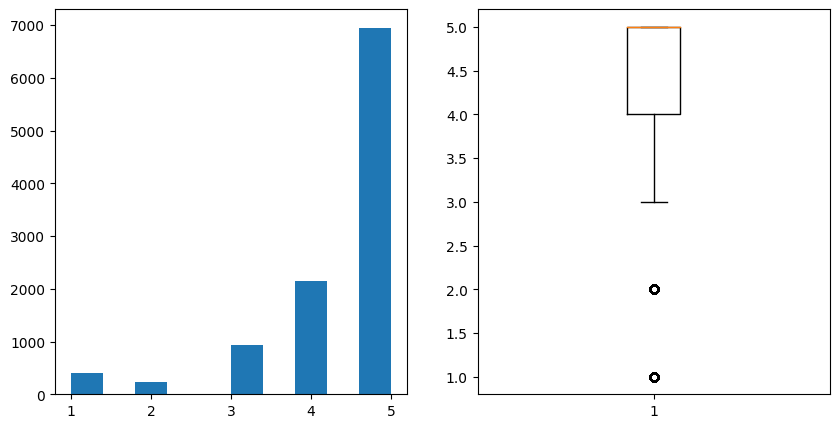

In [15]:
#Mengecek outlier pada variabel user_rating
#Ditemukan outlier pada variabel user_rating
f1 = plt.figure(figsize=(10,5))

f1.add_subplot(1,2,1)
plt.hist('user_rating',data=tourism)

f1.add_subplot(1,2,2)
plt.boxplot(tourism['user_rating'])
plt.show()

In [16]:
tourism.isna()

,placeId,destination_name,category_name,address,Kecamatan,postal_code,state,place_rating,lat,lng,...,two Star,three Star,four Star,five Star,reviewerId,name,text,publishAt,publishedAtDate,user_rating
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,True,True,True,True,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10644,False,False,False,False,False,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,False
10645,False,False,False,False,False,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,False
10646,False,False,False,False,False,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,False
10647,False,False,False,False,False,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,False


In [19]:
#Drop unused data
tourism.drop(['postal_code','state','reviews_count', 'one Star', 'one Star', 'two Star','three Star','four Star','five Star', 'publishAt'], axis = 1, inplace=True)

In [20]:
tourism.isna().sum()

placeId                0
destination_name       0
category_name          0
address                0
Kecamatan              0
place_rating           0
lat                    0
lng                    0
reviewerId             0
name                   0
text                4982
publishedAtDate        0
user_rating            0
dtype: int64

In [18]:
#make matrix 
matrix = tourism.pivot(index='reviewerId', columns='placeId', values='user_rating')
matrix = matrix.fillna(0)
matrix

placeId,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,65
reviewerId,,,,,,,,,,,,,,,,,,,,,
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
3,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
4,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
8746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
8747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
